# <center>- EXTRACTION DE CARACTÉRISTIQUES DE VISAGES -</center>

In [1]:
#  License: BSD
#  -*- coding: utf-8 -*-

#  Authors: Vlad Niculae, Alexandre Gramfort, Slim Essid


from time import time

import matplotlib.pyplot as plt

import numpy as np
from numpy.random import RandomState

from sklearn import decomposition
from sklearn.datasets import fetch_olivetti_faces

In [2]:
# -- Prepare data and define utility functions --------------------------------

n_row, n_col = 2, 5
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)

# Load faces data
dataset = fetch_olivetti_faces(shuffle=True, random_state=rng)
faces = dataset.data

n_samples, n_features = faces.shape

# global centering
faces_centered = faces - faces.mean(axis=0, dtype=np.float64)

print("Dataset consists of %d faces" % n_samples)


def plot_gallery(title, images):
    """Plot images as gallery"""
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        comp = comp.reshape(image_shape)
        vmax = comp.max()
        vmin = comp.min()
        dmy = np.nonzero(comp < 0)
        if len(dmy[0]) > 0:
            yz, xz = dmy
        comp[comp < 0] = 0

        plt.imshow(comp, cmap=plt.cm.gray, vmax=vmax, vmin=vmin)

        if len(dmy[0]) > 0:
            plt.plot(xz, yz, 'r,', hold=True)
            print(len(dmy[0]), "negative-valued pixels")

        plt.xticks(())
        plt.yticks(())

    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

# Plot a sample of the input data
plot_gallery("First centered Olivetti faces", faces_centered[:n_components])

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to /Users/bertrrandBertrand/scikit_learn_data
Dataset consists of 400 faces
2061 negative-valued pixels
2773 negative-valued pixels
2630 negative-valued pixels
1422 negative-valued pixels
1242 negative-valued pixels
1004 negative-valued pixels
2049 negative-valued pixels
1580 negative-valued pixels
1387 negative-valued pixels
3819 negative-valued pixels


In [3]:
# -- Decomposition methods ----------------------------------------------------

# List of the different estimators and whether to center the data

estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init=None, tol=1e-6,
                       sparseness=None, max_iter=1000),
     False)
]

Extracting the top 10 Eigenfaces - PCA...
done in 0.214s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1883 negative-valued pixels
2221 negative-valued pixels
2127 negative-valued pixels
Extracting the top 10 Non-negative components - NMF...
done in 18.892s


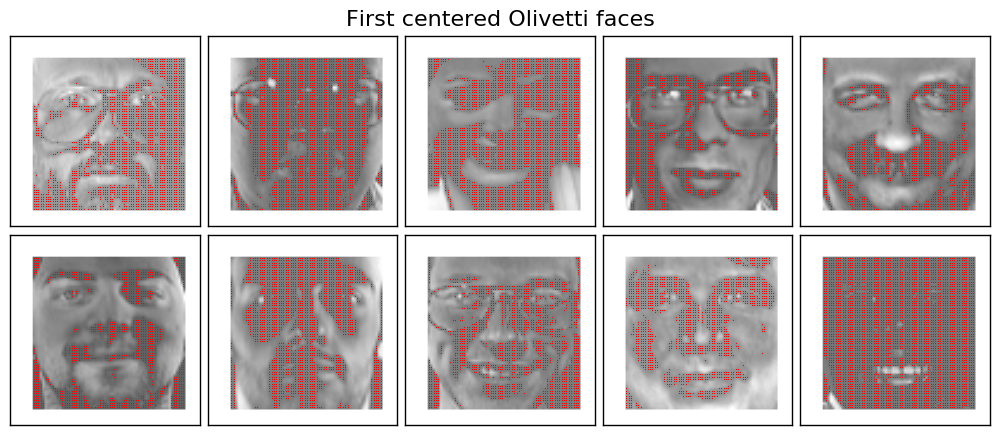

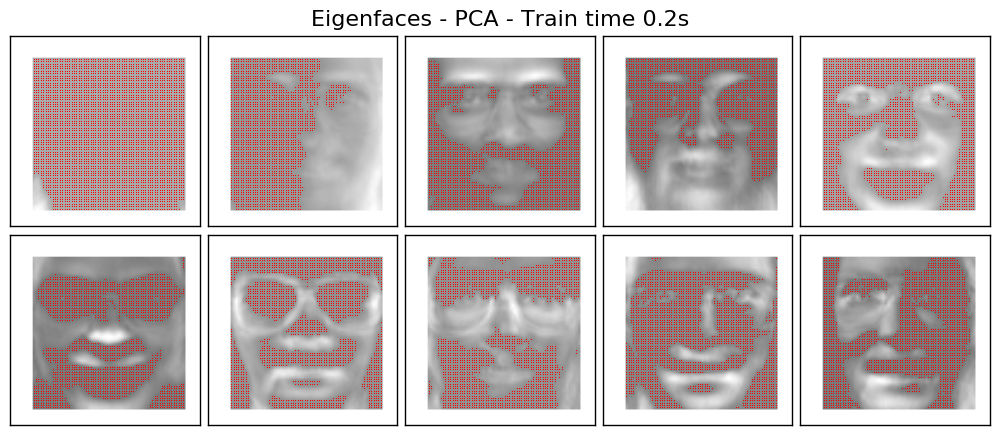

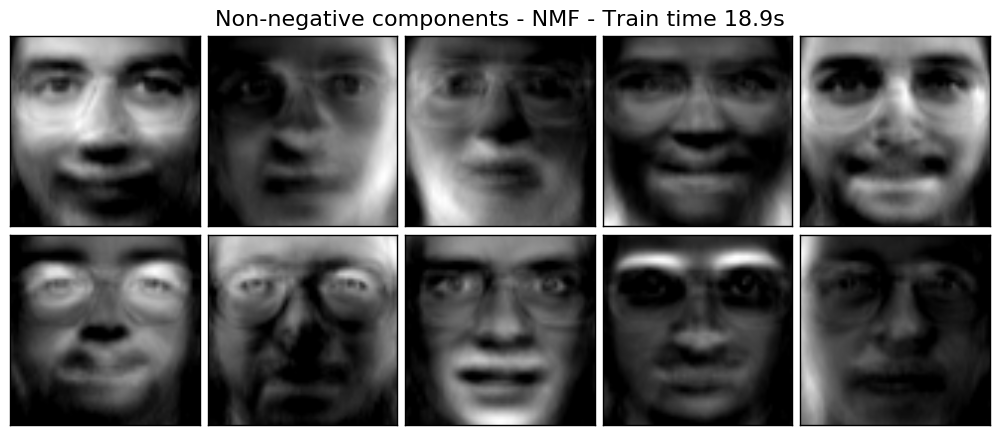

In [4]:
# -- Transform and classify ---------------------------------------------------

labels = dataset.target
X = faces
X_ = faces_centered

for shortname, name, estimator, center in estimators:
    #if shortname != 'nmf':
    #    continue
    print("Extracting the top %d %s..." % (n_components, name))
    t0 = time()

    data = X
    if center:
        data = X_

    data = estimator.fit_transform(data)

    train_time = (time() - t0)
    print("done in %0.3fs" % train_time)

    components_ = estimator.components_  

    plot_gallery('%s - Train time %.1fs' % (name, train_time),
                 components_[:n_components])

plt.show()


### Question 1 : Analyser le type de décomposition obtenu par NMF en comparaison avec celui obtenu par PCA.

=> Les points rouges sont les points négatifs.
Le deuxième plot représente l'eigenface (vecteur propre) d'un ACP, le troisième l'eigenface d'un NMF.
Le NMF (Nonnegetive Matrix Factorization) ôte les points négatifs.

### Question 2 :
Modifier le script pour réaliser une évaluation des performances d’un système de reconnaissance
automatique de visages utilisant les caractéristiques extraites par PCA, comparées
à celles obtenues par un système exploitant les caractéristiques extraites par NMF.<br><br>
On pourra utiliser la <u>LDA (Linear Discriminant Analysis)</u> pour la classification. On effectuera l’évaluation par validation
croisée. On observera l’évolution des scores en faisant varier le nombre de composantes
utilisé dans les décompositions.<br>
PCA comme NMF opèrent des projections, qui réduisent les dimensions de l'espace.

Extracting the top 1 Eigenfaces - PCA...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 0.583s
3998 negative-valued pixels
Extracting the top 1 Non-negative components - NMF...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 11.199s
Extracting the top 3 Eigenfaces - PCA...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 0.533s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
Extracting the top 3 Non-negative components - NMF...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 18.684s
Extracting the top 7 Eigenfaces - PCA...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 0.542s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
Extracting the top 7 Non-negative components - NMF...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 19.672s
Extracting the top 10 Eigenfaces - PCA...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 0.703s
3998 negative-valued pixels
2078 negative-valued pixels
1967 negative-valued pixels
1862 negative-valued pixels
2261 negative-valued pixels
1924 negative-valued pixels
1951 negative-valued pixels
1884 negative-valued pixels
2221 negative-valued pixels
2129 negative-valued pixels
Extracting the top 10 Non-negative components - NMF...


//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/lib/python3.5/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[ 0.95   0.95   0.95   0.85   0.925]
done in 20.184s


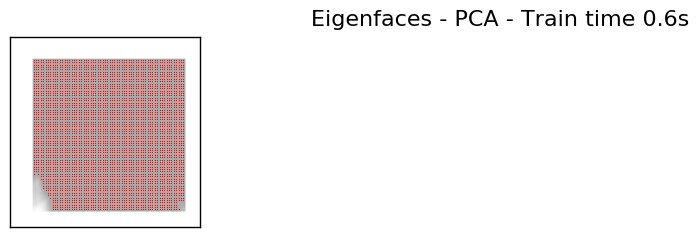

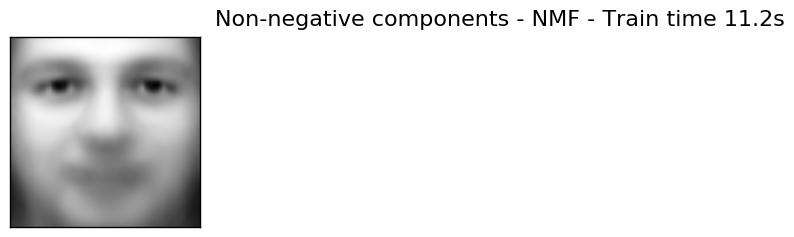

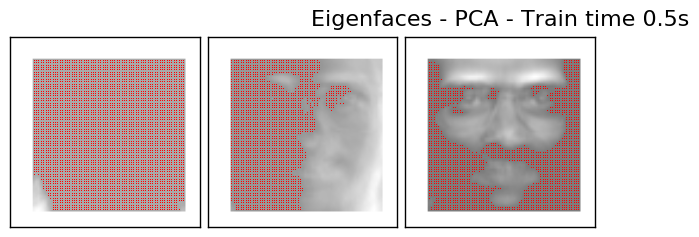

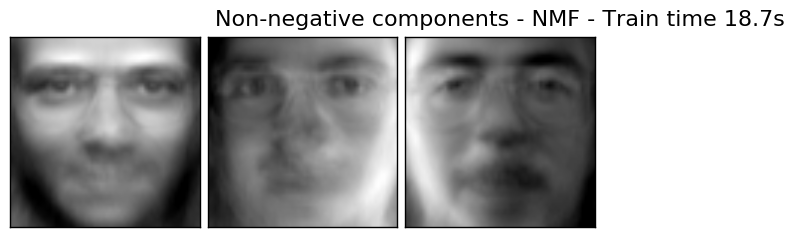

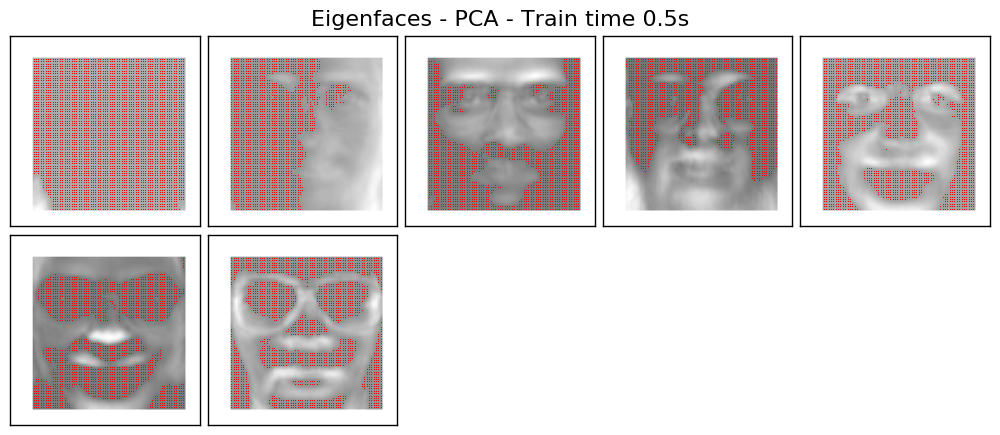

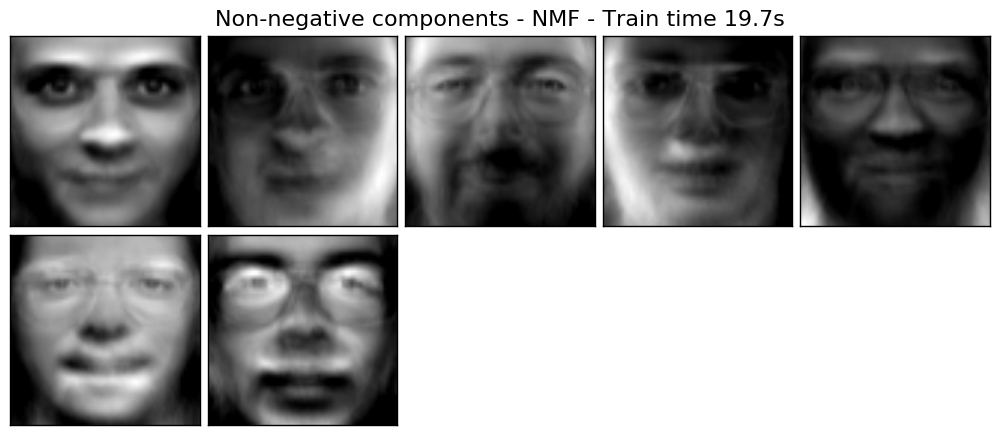

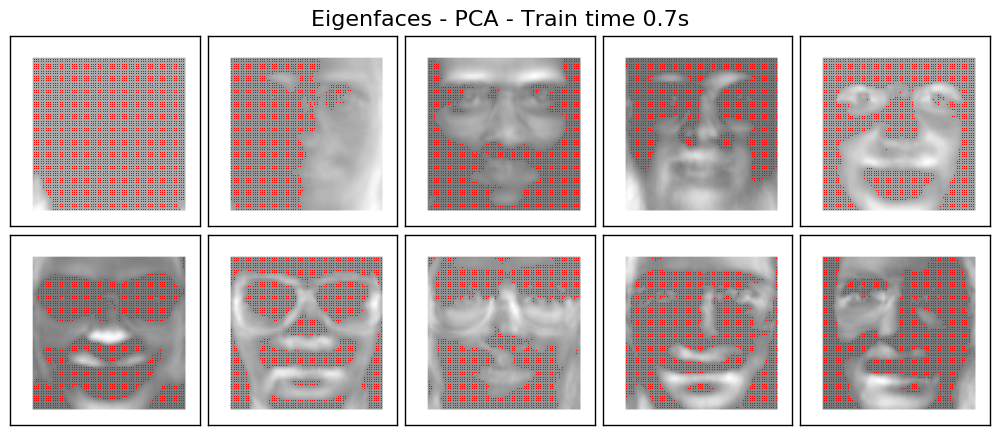

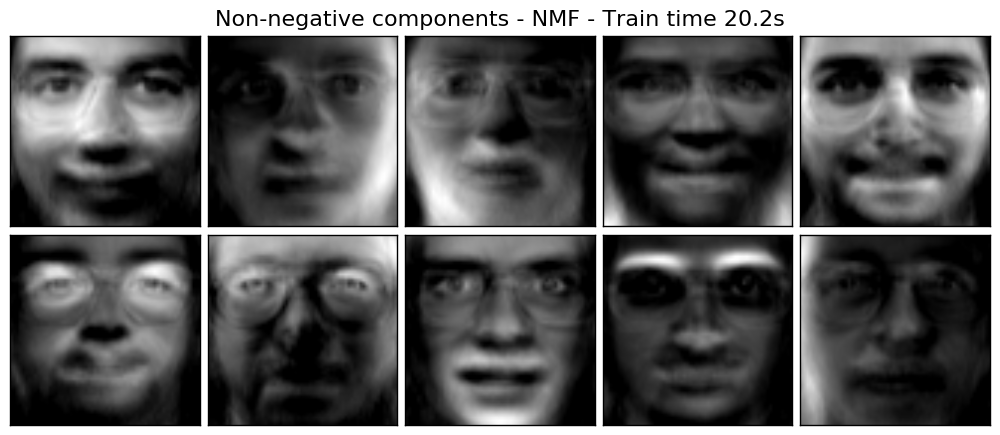

In [25]:
# -- Transform and classify ---------------------------------------------------
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

labels = dataset.target
X = faces
X_ = faces_centered



for i, n_components in enumerate([1,3,7,10]):

    estimators = [
    ('pca', 'Eigenfaces - PCA',
     decomposition.PCA(n_components=n_components, whiten=True),
     True),

    ('nmf', 'Non-negative components - NMF',
     decomposition.NMF(n_components=n_components, init=None, tol=1e-6,
                       sparseness=None, max_iter=1000),
     False)
    ]
    
    for shortname, name, estimator, center in estimators:
        #if shortname != 'nmf':
        #    continue
        print("Extracting the top %d %s..." % (n_components, name))
        t0 = time()

        data = X
        if center:
            data = X_

        data = estimator.fit_transform(data)

        # on classifie les vecteurs avec LDA pour comparer les scores des méthodes
        lda = LinearDiscriminantAnalysis(n_components=i)

        clf = lda.fit(X_train, y_train)

        # cross_val_score() fait déjà un stratified k fold
        scores = cross_val_score(clf, X_test, y_test, cv=5)
        #score = clf.score(X_test, y_test)

        print(scores)

        train_time = (time() - t0)
        print("done in %0.3fs" % train_time)

        components_ = estimator.components_  

        plot_gallery('%s - Train time %.1fs' % (name, train_time),
                     components_[:n_components])

plt.show()


# <center>- EXTRACTION DE THÈMES À PARTIR DE TEXTES -</center>

Il s’agit dans cette partie de tester l’utilisation de laNMFpour l’extraction de thèmes à partir
d’un corpus de textes; l’idée principale étant d’interpréter chaque composante NMF extraite
comme étant associée à un thème.

In [28]:
from time import time

from sklearn import datasets
from sklearn import decomposition
from sklearn.feature_extraction import text

n_samples = 1000
n_features = 900
n_topics = 10
n_top_words = 20

# Load the 20 newsgroups dataset and vectorize it using the most common word
# frequency with TF-IDF weighting (without top 5% stop words)

t0 = time()
print("Loading dataset and extracting TF-IDF features...")
dataset = datasets.fetch_20newsgroups(data_home='c:/tmp/', shuffle=True,
                                      random_state=1)

vectorizer = text.CountVectorizer(max_df=0.95, max_features=n_features)
counts = vectorizer.fit_transform(dataset.data[:n_samples])
tfidf = text.TfidfTransformer().fit_transform(counts)
print("done in %0.3fs." % (time() - t0))

# Fit the NMF model
print("Fitting the NMF model on with n_samples=" + str(n_samples) + " and n_features=" + str(n_features))
nmf = decomposition.NMF(n_components=n_topics).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

# Inverse the vectorizer vocabulary to be able
feature_names = vectorizer.get_feature_names()

for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


Loading dataset and extracting TF-IDF features...
done in 1.098s.
Fitting the NMF model on with n_samples=1000 and n_features=900
done in 1.607s.
Topic #0:
the of in and on was to as at is which by were one with for they that when two

Topic #1:
chip clipper key the to encryption keys government be will this public as is or of can that it use

Topic #2:
is that of to not are and the we in as be people they it this there or god their

Topic #3:
edu university host posting cs nntp of re in article cc writes reply distribution washington cwru state mit for anyone

Topic #4:
com hp in article writes inc netcom corp stratus re sun posting nntp host dec ca jim org that corporation

Topic #5:
he his was to and him that who the had my in it but year this ca me team be

Topic #6:
uk ac co of university ___ dc posting host nntp thanks __ sorry college it please where return sun writes

Topic #7:
you to it your my have can if do and that car get like with don on what just so

Topic #8:
nasa gov s

## <center>- SÉPARATION DE SOURCES AUDIO PAR ICA -</center>

On se propose dans cette première partie d’utiliser l’ICA pour séparer les deux sources
audio (monophoniques) sk(n), k 2 {1, 2}, qui composent un mélange stéréophonique xl(n),
l 2 {1, 2}, dit linéaire instantané, c’est-à-dire obtenu par combinaisons linéaires de sources
monophoniques.

### Question 1 - Étudier le script ica_audio.py et l’utiliser pour générer le mélange stéréo. Prendre le temps d’écouter les différents signaux.

petit x : les deux sons mélangés<br>
grand X : concaténation des deux sons s1 et s2

In [31]:
#  -*- coding: utf-8 -*-

# Author: Slim Essid

import wave

import matplotlib.pyplot as plt
import numpy as np

from sklearn import decomposition

# -- Read audio data ----------------------------------------------------------


def wavread(filename):
    """Read .wav file"""
    wf = wave.open(filename)
    s = np.fromstring(wf.readframes(wf.getnframes()), dtype=np.int16)
    wf.close()
    return s


def wavwrite(filename, s, nchannels=1):
    """Write .wav file"""
    wf = wave.open(filename, 'wb')
    wf.setnchannels(nchannels)
    wf.setsampwidth(2)
    wf.setframerate(32000)
    s = s / np.max(np.abs(s)) * 2 ** 14  # normalise arbitrarily
    wf.writeframes(s.astype(np.int16).tostring())
    wf.close()

s1 = wavread('./snd/es02.wav')
s2 = wavread('./snd/si01.wav')

# -- Create stereo mix --------------------------------------------------------

nsmp = min(len(s1), len(s2))
s1 = s1[:nsmp]
s2 = s2[:nsmp]
S = np.c_[s1, s2]
# Mixing matrix
A = np.array([[0.6, 0.5],
             [0.4, 0.5]])
# Do the mix
X = S.dot(A)
# Write mix file
x = np.zeros(2 * nsmp)
x[::2] = X[:, 0]
x[1::2] = X[:, 1]
wavwrite('./snd/mix.wav', x, nchannels=2)

# -- ICA source separation ----------------------------------------------------
# ...

# Visualise sources
# ...

# Write audio sources
# ...

### Question 2 & 3 - Utiliser l’ICA pour extraire les sources originales à partir du mélange. On exploitera pour cela sklearn.decomposition.FastICA. Créer les fichiers audio pour chaque source extraite et les écouter.

In [57]:
# cf http://scikit-learn.org/stable/auto_examples/decomposition/plot_faces_decomposition.html#sphx-glr-auto-examples-decomposition-plot-faces-decomposition-py

from sklearn import decomposition

name = 'Independent components - FastICA'
# on a 2 sources audio
estimator = decomposition.FastICA(n_components=2, whiten=True)
center = True

data = X

S_ = estimator.fit_transform(data)
# components_ est la unmixing matrix
#components_ = estimator.components_


# on sépare ici le son en deux colonnes
#print(X.dot(components_)[:,0].shape)

S1_ = np.zeros(2 * nsmp)
S2_ = np.zeros(2 * nsmp)
S1_[::2] = S_[:,0]
S2_[::2] = S[:, 1]

wavwrite('./snd/demix1.wav', S1_, nchannels=2)
wavwrite('./snd/demix2.wav', S2_, nchannels=2)